### <h1 align="center">**Gaussian fit function for microtubules' minus end distance to the centriole**</h1>

This script is use to call a pre-written library script that compute for the gaussian fit function on a histogram plot microtubules minus end distance to the center of each spindle pole (centriole). The aim is to determine the radius of the centrosome which corresponds with the second value ($x2$) on the x-axis intercept with y-axis when the value on y-axis is at half the maximum peak height of the gaussian peak.

The gaussian function is computed using the following equation:

# $f(x) = Ae^{\frac{-(x - x0)^2}{2σ^2}}$

**Amplitude (A):**
This is the peak height of the Gaussian curve.
>> The amplitude indicates the maximum value of the density function. In the context of a histogram fitted by a Gaussian curve, it represents the height of the curve at its peak. A higher amplitude means a higher peak, suggesting more data points are concentrated around the mean.

**Mean (x0):**
This is the position of the center of the peak.
>The mean is the average or expected value of the distribution. It indicates where the center of the data distribution is located along the x-axis. In a perfectly symmetric Gaussian distribution, this is also the point of symmetry.

**Standard Deviation (σ):**
This measures the width of the peak.
>The standard deviation is a key measure of the spread or dispersion of the data around the mean. A smaller σ indicates that the data points are clustered closely around the mean, resulting in a narrower peak. Conversely, a larger σ suggests a wider spread of data, leading to a broader peak. It essentially describes how much variation or "dispersion" there is from the average (mean).

### **Instruction on how to run this script**

To run this notebook successfully, this notebook must be in the same folder with the python file called **`MTGuassianFitting.py`** 

The file input and output folder(s) should be define in the second cell of this notebook. Also, the name of the input `.csv` file to be  should be added correctly in the third cell of this notebook. It is important to know that all the imported libraries used in this code should be correctly install in a created python environment. The following lines can be used to install the required libraries to run this notebook:

* **Jupyter lab**
`conda install -c conda-forge jupyterlab`
 
* **Pandas**
`pip install pandas`

* **Numpy**
`conda install -c conda-forge numpy`

* **Matplotlib**
`conda install -c conda-forge matplotlib`

* **Scipy**
`conda install -c conda-forge scipy`

### **Bins size estimation** 
To optimally estimate the bins size of the histogram plot, Freedman Diaconis Estimator function was used in the code. For more detail, see link ([Freedman Diaconis Estimator](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html))
# $h = 2  \frac{IQR}{n^{\frac{1}{3}}}$

* $h$: Freedman Diaconis Estimator
* $n$: number or length of data
* $IQR$: Interquartile Range See link ([Freedman Diaconis Estimator](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html))

The binwidth is proportional to the interquartile range (IQR) and inversely proportional to cube root of data.size. 
Can be too conservative for small datasets, but is quite good for large datasets. The IQR is very robust to outliers.


 ### Import libraries to be used 

In [1]:
# library
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, linspace, random, arange
from scipy.optimize import curve_fit, least_squares
from MTGuassianFitting import GuassianFitHistoPlot

### Define the directory path for the input and output folders

In [2]:
# input folder
folder = r'E:\data\Analysis Data\01_python_analysis\input'
fileTable = os.listdir(folder)

# # output folder
save_files = r'E:\data\Analysis Data\01_python_analysis\output'

### Define the values of the `GuassianFitHistoPlot()` function parameters.

The function parameters are intentional made to be dynamic. This will allow for aesthetic adjustment of the output. 

### Color selection: 
The $HEX$ color code or [Matplotlib color names](https://matplotlib.org/stable/gallery/color/named_colors.html) can be used to choose the color of choice in the plot 

### **Note!** 

The parameter values of the function do not affect the mathematical output of the Gaussian function fitting. This has hard-coded into the library script.

In [3]:
folder_input = folder # the input folder that contains the csv file to be analyzed
file_input = fileTable # an OS library file directory reading variable placeholder (This parameter must not be altered)
csvfilename = 'Data_T0577_32cell_LD.csv' # the name of the csv file to be analyzed
save_folder = save_files # the output folder variable where the output file will be saved
csvsavefilename = 'Gaussian_fit_parameter_measurements' # desired name of the output csv files

# for pole 1
columnname1 = 'minus_dist_to_pole' # the name of the column of interest to be analyzed from the csv file            
Pole1_MT_id1 =  'Pole1_01' # first pole 1 microtubules identity identifier from columnname1
Pole1_MT_id2 ='Pole1_02' # second pole 1 microtubules identity identifier from columnname1

# for pole 2
columnname2 ='minus_dist_to_pole' # the name of the column of interest to be analyzed from the csv file  
Pole2_MT_id1 = 'Pole2_01' # first pole 2 microtubules identity identifier from columnname1
Pole2_MT_id2 = 'Pole2_02' # second pole 2 microtubules identity identifier from columnname1

# pole 1
pole1_hist_color = 'green' # color of the plotted histogram of pole 1
pole1_label = 'Pole 1 MTs histogram' # legend name of the plotted pole 1 histogram
pole1_fit_label = 'Pole 1' # legend name for the plotted fit curve of pole 1
pole1_fit_line_color = 'r'# color of the legend name for the plotted fit curve of pole 1
pole1_vline_color = 'r' # color of the vertical line on x2 of x-axis when y is at half maximum the peak
pole1_hline_color = 'r' # color of the horizontal line on y2 of y-axis at half maximum the peak

# pole 2
pole2_hist_color = 'orange' # color of the plotted histogram of pole 2
pole2_label = 'pole 2 MTs histogram' # legend name of the plotted pole 2 histogram
pole2_fit_label = 'Pole 2'  # legend name for the plotted fit curve of pole 2
pole2_fit_line_color = 'b' # color of the legend name for the plotted fit curve of pole 2
pole2_vline_color = 'b' # color of the vertical line on x2 of x-axis when y is at half maximum the peak
pole2_hline_color = 'b' # color of the horizontal line on y2 of y-axis at half maximum the peak

minimum_xlim = 0 # minimum value range to be plotted on the x-axis
maximum_xlim = 8 # maximum value range to be plotted on the x-axis
minimum_ylim = 0 # minimum value range to be plotted on the y-axis
maximum_ylim = 3 # maximum value range to be plotted on the y-axis

plot_title_fontsize = 20 # fontsize of the plot title
xaxis_label_fontsize = 20 # fontsize of the x-axis title
yaxis_label_fontsize = 20 # fontsize of the y-axis title

plot_title = 'MTs minus end distance to pole center' # plot title
xaxis_title = 'Minus end distance to centriole (µm)' # x-axis title
yaxis_title = 'Frequency of occurrance' # y-axis title
plot_filename = 'MTs_pole_Guassian_fit()' # name of the output plot file to be saved in the save folder

### Gaussian function call
The parameters of the function in the cell below must be pre-defined in the cell above for the function to run correctly

C:\Users\thewo\mambaforge\envs\FuncFitting\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


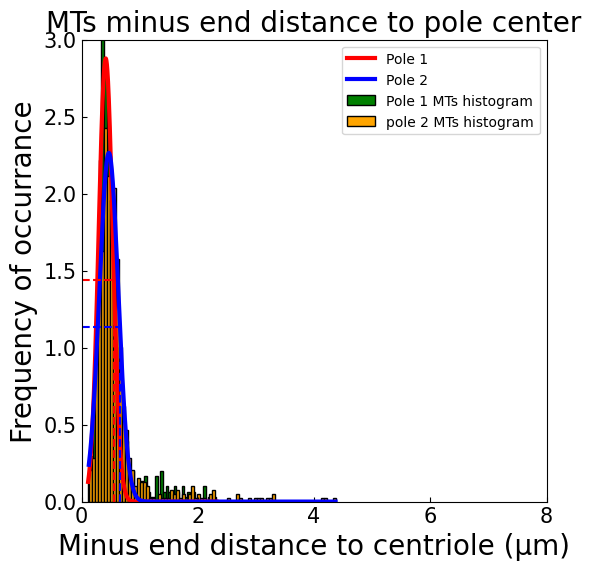

In [4]:
# Call the fit function after defining the function parameters correctly in the previous cell.
GuassianFitHistoPlot(folder_input, 
                     file_input, 
                     csvfilename, 
                     save_folder, 
                     csvsavefilename,
                     columnname1, 
                     Pole1_MT_id1, 
                     Pole1_MT_id2, 
                     columnname2, 
                     Pole2_MT_id1, 
                     Pole2_MT_id2, 
                     pole1_hist_color, 
                     pole1_label, 
                     pole1_fit_label, 
                     pole1_fit_line_color, 
                     pole1_vline_color, 
                     pole1_hline_color, 
                     pole2_hist_color, 
                     pole2_label, 
                     pole2_fit_label, 
                     pole2_fit_line_color, 
                     pole2_vline_color, 
                     pole2_hline_color,
                     minimum_xlim, 
                     maximum_xlim,
                     minimum_ylim, 
                     maximum_ylim, 
                     plot_title_fontsize, 
                     xaxis_label_fontsize, 
                     yaxis_label_fontsize, 
                     plot_title, 
                     xaxis_title, 
                     yaxis_title, 
                     plot_filename)